In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [41]:
a = 0
b = 1
h = 0.05
x = np.arange(a, b+h, h)
u = np.zeros_like(x)
v = np.zeros_like(x)
u[0] = 1
v[0] = 2

f = lambda x, u, v: 2*np.tan(x)/(1+x)*np.log(1+x)-np.cos(x)-1/(1+x)*v-np.tan(x)/(1+x)*u
u0 = np.cos(x)+2*np.log(1+x)

In [42]:
def Euler(x, u, v):
    for i in range(len(x[:-1])):
        u[i+1] = u[i] + h*v[i]
        v[i+1] = v[i] + h*f(x[i], u[i], v[i])
    return u

def RK4(x, u, v):
    for i in range(len(x[:-1])):
        k1 = v[i]
        q1 = f(x[i], u[i], v[i])
        k2 = v[i]+q1*h/2
        q2 = f(x[i]+h/2, u[i]+k1*h/2, v[i]+q1*h/2)
        k3 = v[i]+q2*h/2
        q3 = f(x[i]+h/2, u[i]+k2*h/2, v[i]+q2*h/2)
        k4 = v[i]+q3*h
        q4 = f(x[i]+h, u[i]+k3*h, v[i]+q3*h)
        u[i+1] = u[i] + h/6*(k1+2*k2+2*k3+k4)
        v[i+1] = v[i] + h/6*(q1+2*q2+2*q3+q4)
    return u

def Adams(x, u, v):
    for i in [0, 1, 2]:
        u[i] = RK4(x, u, v)[i]
        v[i] = RK4v(x, u, v)[i]
    for i in range(3, len(x[2:])):
        k1 = v[i]
        k2 = v[i-1]
        k3 = v[i-2]   
        q1 = f(x[i], u[i], v[i])
        q2 = f(x[i-1], u[i-1], v[i-1])
        q3 = f(x[i-2], u[i-2], v[i-2])  
        u[i+1] = u[i] + h/12*(23*k1-16*k2+5*k3)
        v[i+1] = v[i] + h/12*(23*q1-16*q2+5*q3)
    return u

In [47]:
print(u0)
print('RK4', RK4(x, u, v))
print('Adams', Adams(x, u, v))

[1.         1.09633059 1.18562452 1.26829496 1.34470969 1.41519952
 1.48006502 1.5395819  1.59400547 1.64357422 1.68851278 1.72903438
 1.76534287 1.79763437 1.82609869 1.85092044 1.87228004 1.89035442
 1.90531774 1.91734183 1.92659667]
RK4 [1.         1.09633057 1.18562449 1.26829492 1.34470963 1.41519946
 1.48006495 1.53958182 1.59400539 1.64357413 1.68851269 1.72903429
 1.76534278 1.79763428 1.82609859 1.85092035 1.87227994 1.89035432
 1.90531764 1.91734173 1.92659657]
Adams [1.         1.09633057 1.18562449 1.26829492 1.34472517 1.4152216
 1.48009122 1.53960862 1.59403002 1.64359443 1.68852695 1.72904118
 1.76534127 1.79762357 1.8260781  1.85088965 1.87223877 1.89030254
 1.90525519 1.91726868 1.92659657]


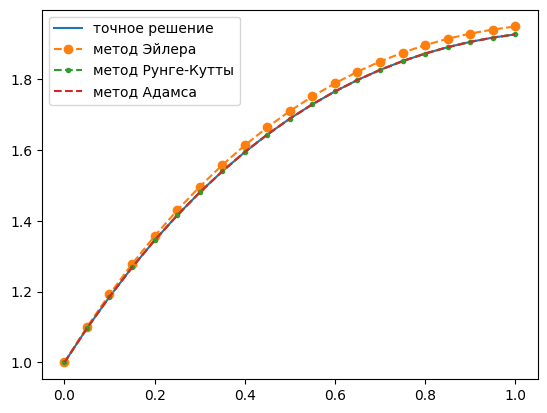

In [48]:
plt.plot(x, u0, label='точное решение')
plt.plot(x, Euler(x, u, v), 'o--', label='метод Эйлера')
plt.plot(x, RK4(x, u, v), '.--', label='метод Рунге-Кутты')
plt.plot(x, Adams(x, u, v), '--', label='метод Адамса')
plt.legend()
plt.show()

In [49]:
print(mean_squared_error(u0, Euler(x, u, v)))
print(mean_squared_error(u0, RK4(x, u, v)))
print(mean_squared_error(u0, Adams(x, u, v)))

0.00036810031431448774
6.707590893933296e-15
8.826509216724855e-10


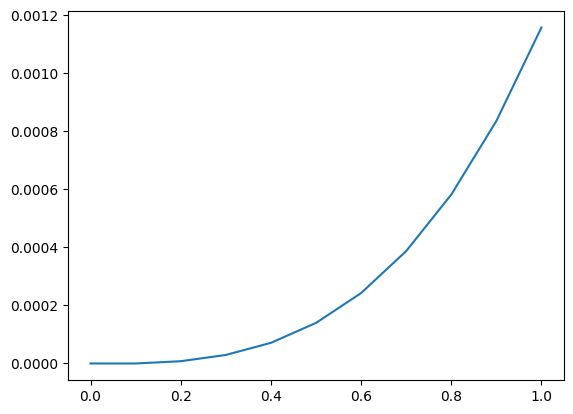

In [50]:
xk = np.arange(a, b+0.1, 0.1)
error=[]

def RK2(x, u, v):
    for i in range(len(x[:-1])):
        k1 = v[i]
        q1 = f(x[i], u[i], v[i])
        k2 = v[i]+q1*h
        q2 = f(x[i]+h, u[i]+k1*h, v[i]+q1*h)
        u[i+1] = u[i] + h/6*(k1+k2)
        v[i+1] = v[i] + h/6*(q1+q2)
    return u

for i in range(len(xk)):
    error.append(1/3*abs(RK2(x, u, v)[i]-RK2(xk, u, v)[i]))

plt.plot(xk, error)
plt.show()

In [3]:
def RK4v(x, u, v):
    for i in range(len(x[:-1])):
        k1 = v[i]
        q1 = f(x[i], u[i], v[i])
        k2 = v[i]+q1*h/2
        q2 = f(x[i]+h/2, u[i]+k1*h/2, v[i]+q1*h/2)
        k3 = v[i]+q2*h/2
        q3 = f(x[i]+h/2, u[i]+k2*h/2, v[i]+q2*h/2)
        k4 = v[i]+q3*h
        q4 = f(x[i]+h, u[i]+k3*h, v[i]+q3*h)
        u[i+1] = u[i] + h/6*(k1+2*k2+2*k3+k4)
        v[i+1] = v[i] + h/6*(q1+2*q2+2*q3+q4)
    return v